<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* pandas functions 
* np 
* regression 
* timestamp

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date, time, timedelta, timezone

# pandas functions

In [2]:
list_file = [f'players_{a:02}.csv' for a in range(15,22)]
d1 = pd.concat(map(pd.read_csv, list_file))
d1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [4]:
top_nans = pd.DataFrame(d1.isnull().sum()[d1.isnull().sum()!=0], columns = ['nans']).nlargest(3, 'nans')
top_nans

,nans
loaned_from,115638
nation_position,115156
nation_jersey_number,115156


In [5]:
d1[top_nans.index].fillna(d1.mode().iloc[0,0]).head()

,loaned_from,nation_position,nation_jersey_number
0,41.0,CF,10.0
1,41.0,LW,7.0
2,41.0,RS,11.0
3,41.0,ST,10.0
4,41.0,GK,1.0


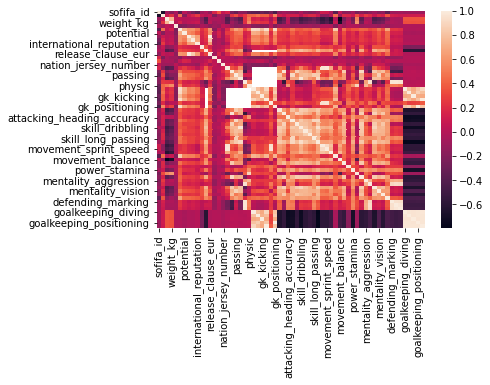

In [6]:
sns.heatmap(d1.corr())

In [9]:
d2 = pd.read_csv('pivot.csv', parse_dates = ['month'], dtype = {'state':'category'})
d2.head()

,month,state,permit
0,2020-04-30,Alabama,21276.0
1,2020-04-30,Alaska,85.0
2,2020-04-30,California,24460.0
3,2020-04-30,Massachusetts,5074.0
4,2020-04-30,North Dakota,280.0


In [11]:
s1 = pd.pivot_table(d2, index = 'state', columns = 'month', values = 'permit')
s1

month,2020-01-31,2020-02-29,2020-03-31,2020-04-30
state,,,,
Alabama,37140.0,29633.0,31205.0,21276.0
Alaska,223.0,139.0,143.0,85.0
California,34694.0,32002.0,27792.0,24460.0
Massachusetts,9289.0,9173.0,NaN,5074.0
North Dakota,370.0,396.0,587.0,280.0


In [12]:
s1.columns = s1.columns.astype('str')
s1 =  s1.reset_index()
s1

month,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [13]:
s1.columns.name = None
s1

,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [14]:
s2 = pd.melt(s1, id_vars = 'state', var_name = 'month', value_name = 'permit')
s2.head()

,state,month,permit
0,Alabama,2020-01-31,37140.0
1,Alaska,2020-01-31,223.0
2,California,2020-01-31,34694.0
3,Massachusetts,2020-01-31,9289.0
4,North Dakota,2020-01-31,370.0


In [15]:
s2 = s2[d2.columns]
s2.head()

,month,state,permit
0,2020-01-31,Alabama,37140.0
1,2020-01-31,Alaska,223.0
2,2020-01-31,California,34694.0
3,2020-01-31,Massachusetts,9289.0
4,2020-01-31,North Dakota,370.0


In [16]:
s2.month = s2.month.to_numpy().astype('datetime64[D]')
s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   20 non-null     datetime64[ns]
 1   state   20 non-null     category      
 2   permit  19 non-null     float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 508.0 bytes


# np

In [17]:
d3  = pd.DataFrame({'user_id' : range(1, 7), 
                    'purchase_date' : ["2015-01-23 14:05:21", "2015-02-05 05:07:30", 
                                       "2015-02-18 17:08:51", "2015-03-21 17:07:30", 
                                       "2015-03-11 18:32:56", "2015-03-03 11:02:30"]})

d3.purchase_date = pd.to_datetime(d3.purchase_date)
d3

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [19]:
d3.assign(month1 = d3.purchase_date.to_numpy().astype('datetime64[M]'),
          month2 = d3.purchase_date.dt.floor('D') - pd.offsets.MonthBegin(),
          month3 = d3.purchase_date.dt.to_period('M').dt.to_timestamp(),
          month4 = d3.purchase_date.apply(lambda x : x.strftime('%Y-01-01'))
          )

,user_id,purchase_date,month1,month2,month3,month4
0,1,2015-01-23 14:05:21,2015-01-01,2015-01-01,2015-01-01,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01,2015-02-01,2015-02-01,2015-01-01
2,3,2015-02-18 17:08:51,2015-02-01,2015-02-01,2015-02-01,2015-01-01
3,4,2015-03-21 17:07:30,2015-03-01,2015-03-01,2015-03-01,2015-01-01
4,5,2015-03-11 18:32:56,2015-03-01,2015-03-01,2015-03-01,2015-01-01
5,6,2015-03-03 11:02:30,2015-03-01,2015-03-01,2015-03-01,2015-01-01


In [20]:
x = np.random.randint(0,101, 200)
cond = [x >= 90, x >= 50, x >= 0]
labs = list('ABC')
pd.DataFrame({'score':x, 'grade':np.select(cond,labs)}).head()

,score,grade
0,19,C
1,65,B
2,68,B
3,84,B
4,39,C


# Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import sklearn.datasets as skd
import matplotlib.pyplot as plt

In [24]:
a1 = pd.read_csv('heights.csv')
a2 = pd.read_csv('manhattan.csv')

In [27]:
x = a1.height.values.reshape(-1,1)
y = a1.weight

In [28]:
fit_lm = LinearRegression().fit(x, y)

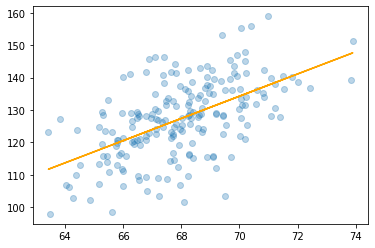

In [30]:
plt.plot(x, y, 'o', alpha = .3)
plt.plot(x, fit_lm.predict(x), color = 'orange')

In [33]:
a2.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [34]:
x = a2[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer']]
y = a2['rent']

In [36]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [37]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

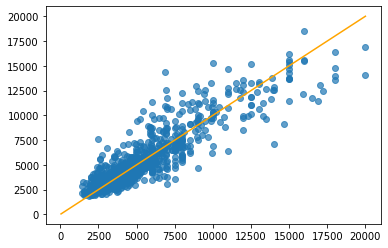

In [39]:
plt.plot(y_te, pred_rf, 'o', alpha = .7)
plt.plot([50, 20000], [50,20000], color = 'orange')

In [44]:
raw = skd.load_diabetes()
[a for a,b in raw.items()]

['data',
 'target',
 'frame',
 'DESCR',
 'feature_names',
 'data_filename',
 'target_filename',
 'data_module']

In [45]:
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [46]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [63]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [65]:
pred_rf = fit_rf.predict(x_te)

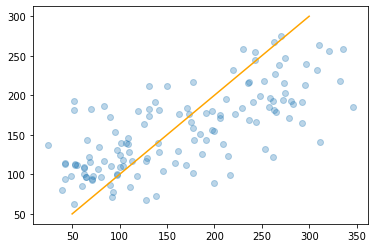

In [67]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)
plt.plot([50,300], [50,300], color = 'orange')

# timestamp

In [70]:
import os
import re

In [95]:
list_file = pd.DataFrame({'file':os.listdir()})
list_file = list_file.assign(flag = list_file.file.str.match(r'^aapl.+'))
b1 = pd.read_csv(list_file[list_file['flag']==True].iloc[0,0], usecols=['Close'])
b1.head()

,Close
0,153.18
1,155.45
2,153.93
3,154.45
4,155.37


In [97]:
b1.columns = [a.lower() for a in b1.columns]
b1.head()

,close
0,153.18
1,155.45
2,153.93
3,154.45
4,155.37


In [98]:
range1 = pd.date_range('2021-06-01', '2021-06-30', freq = 'B')
range1

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-21', '2021-06-22',
               '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', freq='B')

In [99]:
b1.set_index(range1, inplace = True)
b1.head()

,close
2021-06-01,153.18
2021-06-02,155.45
2021-06-03,153.93
2021-06-04,154.45
2021-06-07,155.37


In [104]:
b1 = b1.assign(prev = b1.close.shift(1),
          diff = b1.close - b1.close.shift(1)
          )
b1.head()

,close,prev,diff
2021-06-01,153.18,NaN,NaN
2021-06-02,155.45,153.18,2.27
2021-06-03,153.93,155.45,-1.52
2021-06-04,154.45,153.93,0.52
2021-06-07,155.37,154.45,0.92


In [106]:
b2 = b1.asfreq('H', method = 'pad')
b2.head()

,close,prev,diff
2021-06-01 00:00:00,153.18,NaN,NaN
2021-06-01 01:00:00,153.18,NaN,NaN
2021-06-01 02:00:00,153.18,NaN,NaN
2021-06-01 03:00:00,153.18,NaN,NaN
2021-06-01 04:00:00,153.18,NaN,NaN


In [109]:
b2.tz_localize('asia/seoul')

,close,prev,diff
2021-06-01 00:00:00+09:00,153.18,NaN,NaN
2021-06-01 01:00:00+09:00,153.18,NaN,NaN
2021-06-01 02:00:00+09:00,153.18,NaN,NaN
2021-06-01 03:00:00+09:00,153.18,NaN,NaN
2021-06-01 04:00:00+09:00,153.18,NaN,NaN
...,...,...,...
2021-06-29 20:00:00+09:00,143.68,145.83,-2.15
2021-06-29 21:00:00+09:00,143.68,145.83,-2.15
2021-06-29 22:00:00+09:00,143.68,145.83,-2.15
2021-06-29 23:00:00+09:00,143.68,145.83,-2.15
